# 1. Exploratory Data Analysis of Financial News

In [76]:
# Import the dependencies used in the project
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# nltk for text cleaning
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import re
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

# Format numbers in DataFrames to have two decimal places
pd.set_option('display.float_format', lambda x: '%.2f' % x)

# Load the initial data file into a DataFrame and preview
news = pd.read_csv("Data/article-data.csv", encoding="ISO-8859-1")
news

,Sentiment,Text
0,neutral,"According to Gran , the company has no plans t..."
1,neutral,Technopolis plans to develop in stages an area...
2,negative,The international electronic industry company ...
3,positive,With the new production plant the company woul...
4,positive,According to the company 's updated strategy f...
...,...,...
4841,negative,LONDON MarketWatch -- Share prices ended lower...
4842,neutral,Rinkuskiai 's beer sales fell by 6.5 per cent ...
4843,negative,Operating profit fell to EUR 35.4 mn from EUR ...
4844,negative,Net sales of the Paper segment decreased to EU...


### 1.1 Exploring the Data

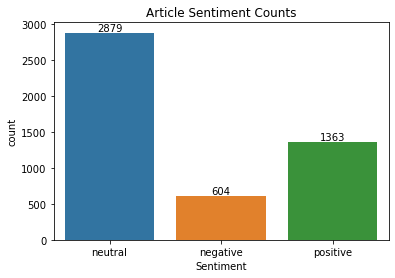

In [56]:
# Chart the different types of sentiment captured
ax = sns.countplot(x = news["Sentiment"])
ax.bar_label(ax.containers[0])
ax.set(title="Article Sentiment Counts")
plt.savefig("Images/Article Sentiment Counts.png")
plt.show()

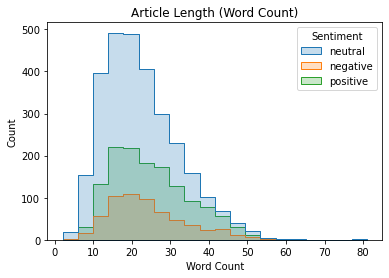

The average article is 23 words long.
The median article is 21 words long.


In [58]:
# Create a new column for the word count
news["Word Count"] = news["Text"].str.split().str.len()

# Plot a histogram to show the word count distribution
sns.histplot(data = news, x = "Word Count", bins=20, hue = "Sentiment", element = "step").set(title="Article Length (Word Count)")
plt.savefig("Images/Article Word Count Length.png")
plt.show()

# Print the average and median word count
print(f'The average article is {news["Word Count"].mean():.0f} words long.')
print(f'The median article is {news["Word Count"].median():.0f} words long.')

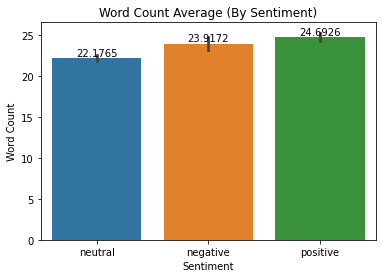

In [65]:
# Chart the average word length for each sentiment
ax = sns.barplot(data = news, x = "Sentiment", y = "Word Count")
ax.bar_label(ax.containers[0])
ax.set(title="Word Count Average (By Sentiment)")
plt.savefig("Images/Average Sentiment Word Count.png")
plt.show()

In [71]:
# Split the data into positive, neutral and negative data
positive = news[(news.Sentiment == "positive")]
positive = pd.DataFrame(positive["Text"])

neutral = news[(news.Sentiment == "neutral")]
neutral = pd.DataFrame(neutral["Text"])

negative = news[(news.Sentiment == "negative")]
negative = pd.DataFrame(negative["Text"])

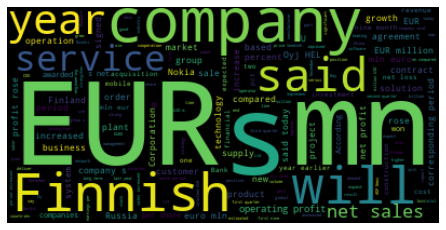

In [78]:
# Positive wordcloud
text = " ".join(review for review in positive.Text.astype(str))
stopwords = set(STOPWORDS)

wordcloud = WordCloud(stopwords=stopwords).generate(text)

plt.axis("off")
plt.tight_layout(pad=0)
plt.imshow(wordcloud, interpolation='bilinear')
plt.savefig('Images/Positive Cloud.png')
plt.show()

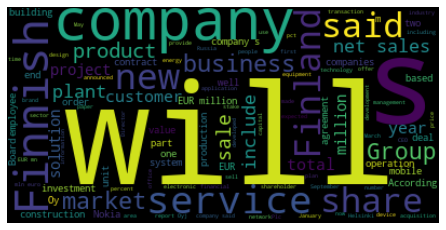

In [79]:
# Neutral wordcloud
text = " ".join(review for review in neutral.Text.astype(str))
stopwords = set(STOPWORDS)

wordcloud = WordCloud(stopwords=stopwords).generate(text)

plt.axis("off")
plt.tight_layout(pad=0)
plt.imshow(wordcloud, interpolation='bilinear')
plt.savefig('Images/Neutral Cloud.png')
plt.show()

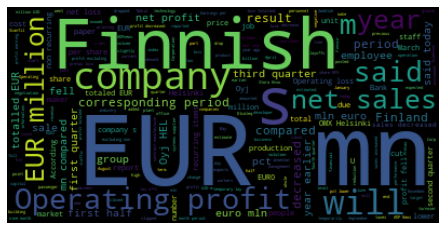

In [80]:
# Negative wordcloud
text = " ".join(review for review in negative.Text.astype(str))
stopwords = set(STOPWORDS)

wordcloud = WordCloud(stopwords=stopwords).generate(text)

plt.axis("off")
plt.tight_layout(pad=0)
plt.imshow(wordcloud, interpolation='bilinear')
plt.savefig('Images/Negative Cloud.png')
plt.show()